In [ ]:
import numpy as np
import torchvision #get a dataset
import torch #pytorch is for especially deep learning, if a GPU is available for us,it allow us to leverage a GPU

Pytorch is an open source Machine Learning Framework

pytorch makes matrix multiplication easy so in DL we will have matrix multiplication in forward and backward propogation. pytorch makes it easy
and pytorch makes autodifference for differentiation

**TorchMetrics** are installed to calculate accuracies

In [ ]:
pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 KB 6.1 MB/s eta 0:00:00


I did practice of tensors with the help of Karthik TA demo lecture

In [ ]:
a = np.random.rand(2,3)
b = torch.from_numpy(a)

print(a)
print(b)

[[0.61558162 0.86317554 0.08849864]
 [0.28419041 0.14127109 0.86399133]]
tensor([[0.6156, 0.8632, 0.0885],
        [0.2842, 0.1413, 0.8640]], dtype=torch.float64)


In [ ]:
print(b.sum())
print(b.shape)
print(b.mean())
print(torch.sin(b))

tensor(2.8567, dtype=torch.float64)
torch.Size([2, 3])
tensor(0.4761, dtype=torch.float64)
tensor([[0.5774, 0.7599, 0.0884],
        [0.2804, 0.1408, 0.7604]], dtype=torch.float64)


In [ ]:
torch.cuda.is_available() #to check whether connected to GPU

False

y(a,b) = (a+b)

In [ ]:
a = torch.rand(1,1,requires_grad=True) #to differentiate in back propogation 
b = torch.rand(1,1)
y=a+b
print(a)
print(b)
print(y)

tensor([[0.9542]], requires_grad=True)
tensor([[0.1850]])
tensor([[1.1392]], grad_fn=<AddBackward0>)


In [ ]:
y.backward()
print("dy/da",a.grad)


dy/da tensor([[1.]])


In [ ]:
a = torch.rand(1,1,requires_grad=True) #to differentiate in back propogation 
b = torch.rand(1,1)
y=a**2*b
print(a)
print(b)
print(y)
y.backward()
print("dy/da",2*a*b)
print("dy/da",a.grad)

tensor([[0.6135]], requires_grad=True)
tensor([[0.8898]])
tensor([[0.3349]], grad_fn=<MulBackward0>)
dy/da tensor([[1.0918]], grad_fn=<MulBackward0>)
dy/da tensor([[1.0918]])


In [ ]:
A = torch.rand(2,2)
B = torch.rand(2,1)
x = torch.rand(2,1,requires_grad = True)
y = torch.matmul(A,x)+B
z = y.sum()
z.backward()
print(z)
print(x)
print("dz/dx",x.grad)

tensor(1.6644, grad_fn=<SumBackward0>)
tensor([[0.1793],
        [0.6189]], requires_grad=True)
dz/dx tensor([[1.1596],
        [0.3899]])


Now we are using FashionMNIST data for training to the model, so downloaded it

In [ ]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST',train = True,download = True,transform = torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST',train = False,download = True,transform = torchvision.transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



The few below cells are just to visualise or observe the data

In [ ]:
print(len(trainingdata))
print(len(testdata))
print(trainingdata)
print(testdata)

60000
10000
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./FashionMNIST
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./FashionMNIST
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
image,label = trainingdata[0]
print(len(trainingdata[0]))

2


here 1 is for grey scale image, if 1st dimension is 3 then it is RGB image

In [ ]:
print(image.squeeze().shape)  #squeezed the image

torch.Size([28, 28])


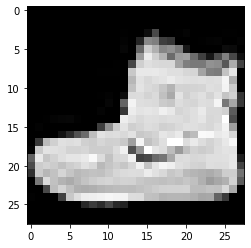

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image.squeeze(),cmap=plt.cm.gray)

we can plot only squeezed image

To work with pytorch we must load the data using dataloader from utils library into dataloaders.
here entire dataset is divided into batches and stored into dataloader

In [ ]:
traindataloader = torch.utils.data.DataLoader(trainingdata, batch_size=64,shuffle=True)
testdataloader = torch.utils.data.DataLoader(testdata, batch_size=64,shuffle=True)

In [ ]:
print(len(traindataloader))


938


tainingdataloader has of 938 batches with batch_size 64
testdataloader has 157 batches of batch size 64.
If entire datapoints not divisible by 64, obviously final batch will have less than 64 images

In [ ]:
print(len(traindataloader))
print(len(testdataloader))
print(len(traindataloader)*64)

938
157
60032


Images,labels have images and labels of training dataset of first batch of 64 images

In [ ]:
images,labels = next(iter(traindataloader)) #we are iterating the dataloader and calling next to get first image, image shape is batch_size*colourmap*height*width
print(images.shape,labels.shape)
print(labels)
print(len(next(iter(traindataloader))))

torch.Size([64, 1, 28, 28]) torch.Size([64])
tensor([8, 3, 6, 5, 2, 7, 4, 8, 3, 4, 5, 7, 3, 8, 8, 5, 5, 3, 7, 4, 8, 0, 6, 5,
        5, 4, 2, 6, 0, 1, 0, 3, 0, 0, 8, 1, 8, 0, 4, 2, 7, 7, 9, 0, 5, 8, 0, 8,
        3, 8, 2, 5, 3, 4, 1, 0, 0, 8, 0, 7, 9, 6, 4, 4])
2


Plotting 5 image training samples here

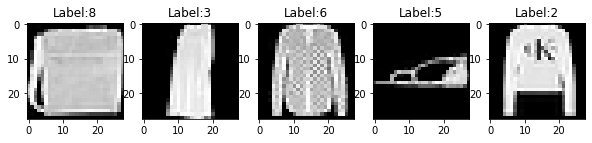

In [ ]:
plt.figure(figsize = (10,4))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.title(f'Label:{labels[i].item()}')
  plt.imshow(images[i].squeeze(),cmap=plt.cm.gray)

In [ ]:
#specify our model
class LogisticReg(torch.nn.Module):
  def __init__(self):
    super(LogisticReg,self).__init__()
    self.linear = torch.nn.Linear(28*28,10)
  def forward(self,x):
    x=x.view(-1,28*28)
    return self.linear(x)


**Understanding 1** 
This is a simple task to build a model with three hidden layers of fully connected dense layers and output dense layer with 10 outputs.
Input is 28*28 flattened 784 inputs given to first hidden layer.
Output of that layer is 1D array of 256 elements. These are given as input to nect layer to get 1D array of 128 elements and these are given as input to next layer to get 64 element 1D array and that is given as input to output layer and it gives 10 outputs.

Relu activation function is given to every layer.
Relu is max(0,x). It will be 0 if x is negative and x if x is positive.
For building a model we just need forward pass,
Backward pass is used for back propagation in later steps
Now, I got clear picture of input and output shapes for every layer, how to give them and how to understand them


**Resource**: I coded it by myself with the help of pytorch tutorial. Link is provided here: https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html

In [ ]:
#for the assignment 
#got from defining a neural network in pytorch webpage
import torch.nn.functional as F #this is imported for relu 
class assignment(torch.nn.Module):
  def __init__(self):
    super(assignment,self).__init__()
    self.dense = torch.nn.Linear(28*28,256) #first hidden layer
    self.dense1 = torch.nn.Linear(256,128) #second hidden layer 
    self.dense2 = torch.nn.Linear(128,64)  #third hidden layer
    self.dense3 = torch.nn.Linear(64,10)   # output layer 
  def forward(self,x):
    x=x.view(-1,28*28)
    x = self.dense(x)
    x = F.relu(x)  #activation function only for hidden layers
    x = self.dense1(x)  #hidden layer 1
    x = F.relu(x)  #activation ReLU
    x = self.dense2(x)   #hidden layer 2
    x = F.relu(x)  #activation relu
    x = self.dense3(x)    #hidden layer 3 there is no activation function for output layer
    return x

We are calling model on GPU

In [ ]:
#call the model
model = assignment().cuda() #calling gpu here
#since we are doing classification problem we are doing crossentropylossfunction
loss = torch.nn.CrossEntropyLoss()   #cross entropyloss is calculated
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)  #Stochastic Gradient Descent optimizer is used

RuntimeError: ignored

**Resource:** I have practiced entire code of training, testing and plotting graphs from listening to karthik's demo

Understanding : Here first we create train_loss_history and test_loss_history lists to store losses for every epoch
Then start training the model in every epoch using model.train()
We iterate the entire data for every batch of dataloaders to calculate the losses and predicted outputs of every batch and take the mean of all batches finally and store it in their history lists
And also since the model is being trained on gpu we have to call the images and labels to gpu

In [ ]:
train_loss_history = []
test_loss_history = []
for epoch in range(40):
  train_loss = 0.0
  test_loss = 0.0
  #Accuracy_metric = 0.0

  model.train()
  #model is trained on train dataset and loss is calculated here
  for i,data in enumerate(traindataloader):
    print(data)
    images,labels=data
    images=images.cuda()  #we get images to gpu to train on gpu
    labels=labels.cuda()  #we get labels to gpu to train it on gpu
    optimizer.zero_grad()
    predicted_outputs = model(images)  #forward pass
    fit = loss(predicted_outputs,labels)  #calculate loss
    fit.backward() #backward pass
    optimizer.step() #update weights of our network
    train_loss+=fit.item()  #we are adding losses of entire batch
  #model is evaluated and tested with test dataset and loss for test data is calculated
  model.eval()
  for i,data in enumerate(testdataloader):
    with torch.no_grad():
      images,labels = data
      images=images.cuda()  #here also we are getting images to gpu
      labels = labels.cuda()  #we are getting labels to gpu
      predicted_outputs = model(images)
      fit = loss(predicted_outputs,labels)
      test_loss+=fit.item()   #adding losses of entire batch
  train_loss = train_loss/len(traindataloader)  #calculating average train loss
  test_loss = test_loss/len(testdataloader)  #calculating average test loss
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  print(f'Epoch{epoch}, train_loss {train_loss}, test_loss {test_loss}')


Streaming output truncated to the last 5000 lines.


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        ...,


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  

KeyboardInterrupt: ignored

**Understanding** Plotting training and testing loss curves. It seems both are decreasing with respect to epochs. So, our model is working well because both are decreasing. So, no overfitting or underfitting is happening here. And also I observed that testing loss is increasing after 30 epochs but the training loss is decreasing, I felt that it is kind of a overfitting problem after 30 epochs. So, I believe 30 epochs is working for my model.

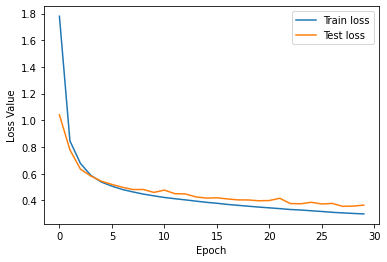

In [ ]:
plt.plot(train_loss_history,label='Train loss')
plt.plot(test_loss_history,label = 'Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

To calculate accuracy I used torchmetrics.


Here using torchmetrics.Accuracy we are calculating accuracy of every batch and taking the average of all those accuracies by dividing it by number of batches. Here also we are taking labels and input to gpu because our model is trained and will be tested on gpu

**Resource:**I took help of torchmetrics documentation and TA Karthik demo lecture and coded everything by myself

In [ ]:
#To calculate accuracy
import torchmetrics #importing torchmetrics to measure accuracy
print(testdata)
acc = 0.0
for i,data in enumerate(testdataloader):
  images,true_labels = data
  images = images.cuda()
  true_labels = true_labels.cuda()
  predicted_labels = model(images)
  accuracy = torchmetrics.Accuracy(task = 'multiclass',num_classes = 10).cuda()
  A=accuracy(predicted_labels,true_labels)
  acc+=A.item()
print(acc/len(testdataloader))

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./FashionMNIST
    Split: Test
    StandardTransform
Transform: ToTensor()
0.8673367834394905


Here, we got the accuracy of nearly 85%

In below cell images from last batch of testdataset

In [ ]:
print(images.shape,labels.shape)  

torch.Size([16, 1, 28, 28]) torch.Size([16])


In [ ]:
predicted_outputs = model(images)
print(predicted_outputs.shape)

torch.Size([16, 10])


We are calculating predicted outputs of last batch of test data of 16 images below. Predicted labels are calculated as maximum of prababilities of 10 labels
Our model gives 10 probabilities of each sample, just predicting what is the probability of that particular label.
We classify it as particular label by calculating maximum of those probabilities

In [ ]:
predicted_labels = torch.max(predicted_outputs,1)[1]
print("predictedlabels",predicted_labels)
print("true labels",true_labels)

predictedlabels tensor([7, 6, 2, 1, 1, 5, 9, 1, 8, 4, 5, 3, 5, 2, 0, 6], device='cuda:0')
true labels tensor([7, 0, 2, 1, 1, 5, 9, 1, 8, 2, 5, 3, 5, 2, 0, 2], device='cuda:0')


We can see clearly in the below 3 images, predicted outputs are the probabilities of all the classes, because we get 10 output values as per our architecture. Our model gives probability of every label for a given input
We then classify it as a label by calculating maximum of that label

tensor([  4.1512,  -1.3928,   4.9674,   6.4358,   7.1077,  -8.6498,   6.8740,
         -9.0522,   4.2558, -11.5250], device='cuda:0',
       grad_fn=<SelectBackward0>)


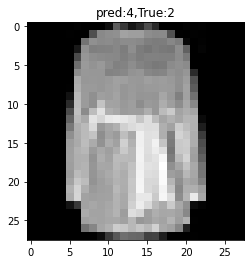

In [ ]:
plt.imshow(images[9].squeeze().cpu(),cmap=plt.cm.gray)
plt.title(f'pred:{predicted_labels[9].item()},True:{true_labels[9].item()}')
print(predicted_outputs[9])

In the above image, it's predicted value is 4. In the output tensor probability for label 4 is greater than all other probabilities. So, it is classified as 4th image type full sleeve shirt 

tensor([  4.0577,  14.4111,   3.5317,   6.2266,   4.0998, -15.4629,  -0.8621,
         -6.8428,  -5.4863,  -4.4462], device='cuda:0',
       grad_fn=<SelectBackward0>)


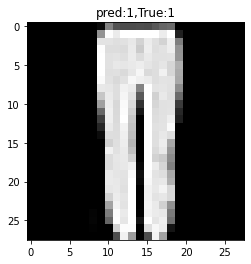

In [ ]:
plt.imshow(images[3].squeeze().cpu(),cmap=plt.cm.gray)
plt.title(f'pred:{predicted_labels[3].item()},True:{labels[3].item()}')
print(predicted_outputs[3])

In the above image, it's predicted value is 1. In the output tensor probability for label 1 is greater than all other probabilities. So, it is classified as 1st image type pair of pants

tensor([  9.4967,   2.8073,   4.3074,   3.9481,   1.0727,  -7.4223,   6.5919,
        -10.7222,   0.6104,  -9.1163], device='cuda:0',
       grad_fn=<SelectBackward0>)


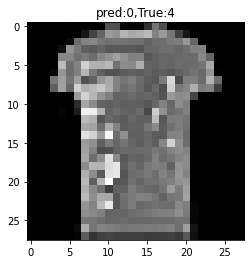

In [ ]:
plt.imshow(images[14].squeeze().cpu(),cmap=plt.cm.gray)
plt.title(f'pred:{predicted_labels[14].item()},True:{labels[14].item()}')
print(predicted_outputs[14])

In the above image, it's predicted value is 0. In the output tensor probability for label 0 is greater than all other probabilities. So, it is classified as 0th image type a shirt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')